In [1]:
from ppm_routines import ppm_routines
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ppm_reconstruction(h, Slayer):    
    Sinterface = np.zeros(np.size(Slayer)+1, dtype=np.float32)
    ppm_routines.interface_scalar(h, Slayer, Sinterface, 2)
    Sl = np.zeros(np.size(Slayer), dtype=np.float32)
    Sr = np.zeros(np.size(Slayer), dtype=np.float32)
    ppm_routines.ppm_left_right_edge_values(Slayer.astype(np.float32), Sinterface, Sl, Sr)
    return Sl, Sr

In [5]:
# Set up some examples based on Alistair's schematics of the neutral diffusion
# Identical columns
hl = np.array([10.,10.,10.,10.])
hr = np.array([10.,10.,10.,10.])
Tr = np.array([20.,16.,12.,10.])
Tl = np.array([18.,14.,10.,8.])

Tl_t, Tl_b = ppm_reconstruction(hl, Tl)
zl_t = hl.cumsum() - hl[0]
zl_b = hl.cumsum()
zl_c = hl.cumsum() - hl/2.

Tr_t, Tr_b = ppm_reconstruction(hr, Tr)
zr_t = hr.cumsum() - hr[0]
zr_b = hr.cumsum()
zr_c = hr.cumsum() - hr/2.

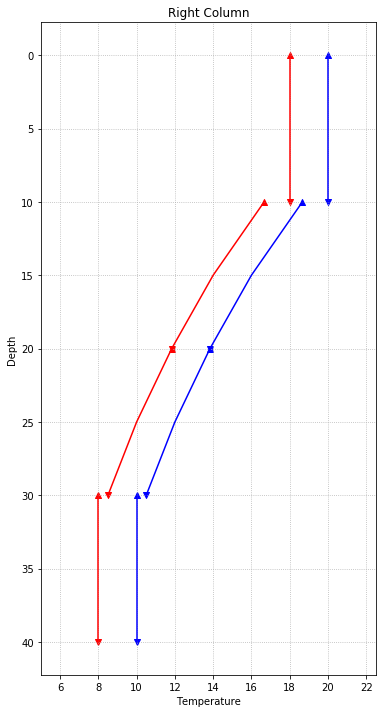

In [7]:
plt.figure(figsize=(6,12))
#plt.subplot(1,2,1)
for k in np.arange(0,hl.size):
    z = np.array( [zl_t[k], zl_c[k], zl_b[k]])
    T = np.array( [Tl_t[k], Tl[k], Tl_b[k]] )
    plt.plot(T,z, color='red')
plt.scatter(Tl_t, zl_t, marker='^', color = 'red')
plt.scatter(Tl_b, zl_b, marker='v', color = 'red')
plt.grid(ls='dotted')
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.title('Left Column')
plt.xlim( (5,22.5) )

#plt.subplot(1,2,2)
for k in np.arange(0,hl.size):
    z = np.array( [zr_t[k], zr_c[k], zr_b[k]] )
    T = np.array( [Tr_t[k], Tr[k], Tr_b[k]] )
    plt.plot(T,z, color = 'blue')
plt.scatter(Tr_t, zr_t, marker='^', color = 'blue')
plt.scatter(Tr_b, zr_b, marker='v', color = 'blue')    
plt.grid(ls='dotted')
plt.xlabel('Temperature')
plt.title('Right Column')
plt.xlim( (5,22.5) )
plt.gca().invert_yaxis()
plt.savefig('warmer_left.eps',format='eps')
plt.show()

In [42]:
print(Tl_t,Tl_b)

[ 18.          16.66666603  11.83333302   8.        ] [ 18.          11.83333302   8.5          8.        ]


In [41]:
print(Tr_b)

[ 20.          13.83333302  10.5         10.        ]


In [32]:
np.interp(Tl_t[1], np.array([Tr_b[1], Tr_t[1]]), np.array([20.,10.]))

14.13793130663716

In [33]:
np.interp(Tr_b[1], np.array([Tl_b[1], Tl_t[1]]), np.array([20.,10.]))

15.86206869336284

In [37]:
np.interp(Tr_b[2], np.array([Tl_b[2], Tl_t[2]]), np.array([30.,20.]))

23.999999427795355

In [20]:
np.interp?

In [22]:
print(Tr_t[1],Tr_b[1])

18.6667 13.8333


In [23]:
np.interp?